In [1]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from core.gaussian_mixture_lib import GaussianMixture

In [52]:

# gmm = GaussianMixture(mus, sigmas, pis)
# Generate random means and covariances for three components
# np.random.seed(1)
# mus = np.random.randn(3, 2)
# sigmas = np.zeros((3, 2, 2))
# for i in range(3):
#     sigmas[i] = np.random.randn(2, 2)
#     sigmas[i] = sigmas[i] @ sigmas[i].T
# pis = np.random.rand(3)
# pis /= np.sum(pis)

mus = np.array([[2, -2], 
                [1, 3],
                [-3, 2],])
sigmas = np.array([[[1, .5], [.5, 1]], 
                   [[.9, -.4], [-.4, 2]],
                   [[1, 0], [0, .3]]])
pis = np.array([0.3, 0.3, 0.3])

gmm = GaussianMixture(mus, sigmas, pis)


(100, 100, 3)


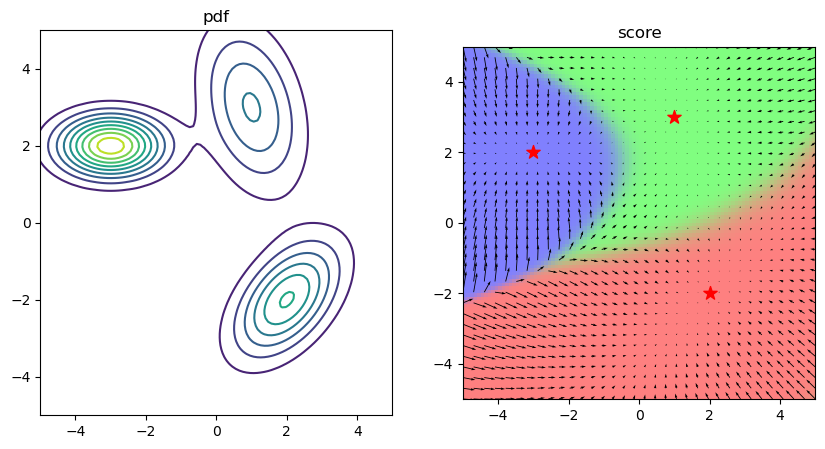

In [53]:
npnts = 100
slc = slice(None, None, 3)
xgrid, ygrid = np.meshgrid(np.linspace(-5, 5, npnts), np.linspace(-5, 5, npnts))
X = np.column_stack([xgrid.ravel(), ygrid.ravel()])
probs = gmm.pdf(X)
probs = probs.reshape(npnts, npnts)
scores = gmm.score(X)
scores_vec = scores.reshape(npnts, npnts, 2)
_, weight_part = gmm.score_decompose(X)
weight_part_map = weight_part.reshape(npnts, npnts, gmm.n_component)
print(weight_part_map.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contour(xgrid, ygrid, probs, levels=10)
plt.title("pdf")
plt.subplot(1, 2, 2)
plt.imshow(weight_part_map[:, :,], extent=(-5, 5, -5, 5), origin='lower', alpha=0.5)
plt.quiver(xgrid[slc, slc], ygrid[slc, slc], scores_vec[slc, slc, 0], scores_vec[slc, slc, 1])
plt.scatter(gmm.mus[:, 0], gmm.mus[:, 1], c='r', s=100, marker='*')
plt.title("score")
plt.show()

(100, 100, 3)


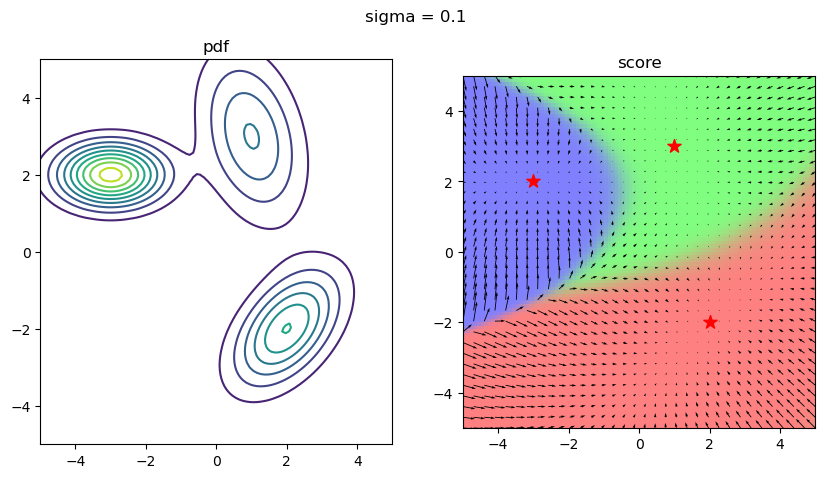

(100, 100, 3)


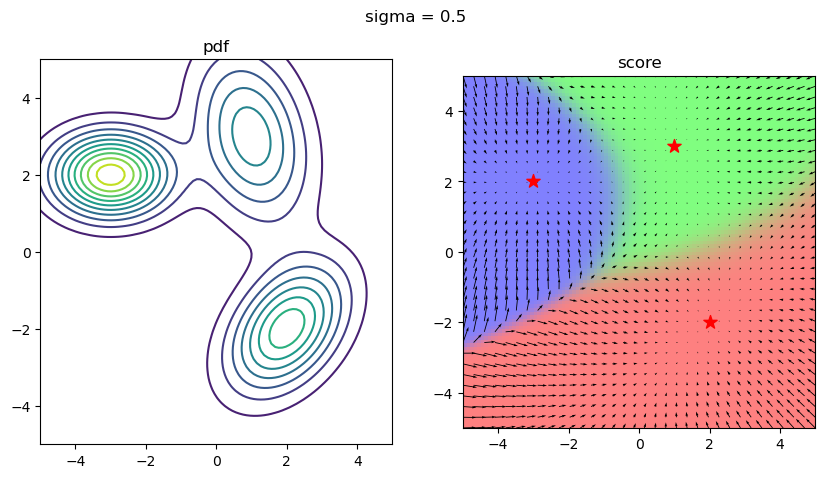

(100, 100, 3)


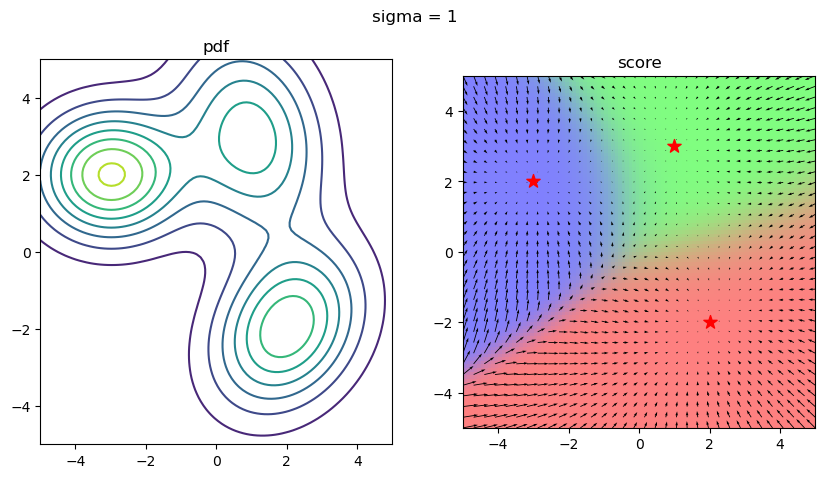

(100, 100, 3)


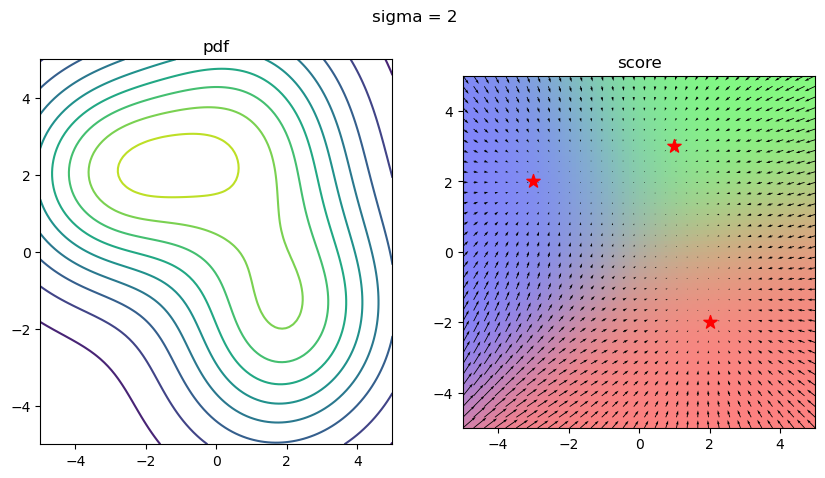

(100, 100, 3)


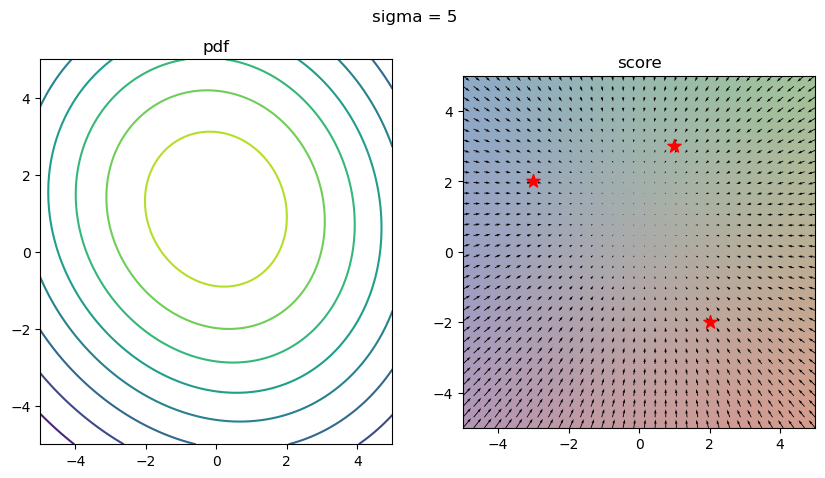

(100, 100, 3)


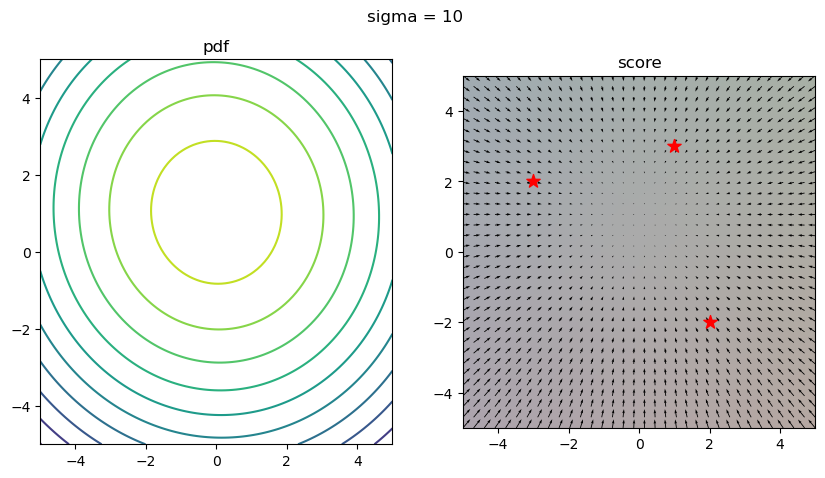

In [56]:

mus = np.array([[2, -2], 
                [1, 3],
                [-3, 2],])
sigmas = np.array([[[1, .5], [.5, 1]], 
                   [[.9, -.4], [-.4, 2]],
                   [[1, 0], [0, .3]]])
pis = np.array([0.3, 0.3, 0.3])
for sigma in [0.1, 0.5, 1, 2, 5, 10]:
    gmm = GaussianMixture(mus, sigmas + sigma**2 * np.eye(2)[None], pis)
    npnts = 100
    slc = slice(None, None, 3)
    xgrid, ygrid = np.meshgrid(np.linspace(-5, 5, npnts), np.linspace(-5, 5, npnts))
    X = np.column_stack([xgrid.ravel(), ygrid.ravel()])
    probs = gmm.pdf(X)
    probs = probs.reshape(npnts, npnts)
    scores = gmm.score(X)
    scores_vec = scores.reshape(npnts, npnts, 2)
    _, weight_part = gmm.score_decompose(X)
    weight_part_map = weight_part.reshape(npnts, npnts, gmm.n_component)
    print(weight_part_map.shape)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.contour(xgrid, ygrid, probs, levels=10)
    plt.title("pdf")
    plt.subplot(1, 2, 2)
    plt.imshow(weight_part_map[:, :,], extent=(-5, 5, -5, 5), origin='lower', alpha=0.5)
    plt.quiver(xgrid[slc, slc], ygrid[slc, slc], scores_vec[slc, slc, 0], scores_vec[slc, slc, 1])
    plt.scatter(gmm.mus[:, 0], gmm.mus[:, 1], c='r', s=100, marker='*')
    plt.title("score")
    plt.suptitle(f"sigma = {sigma}")
    plt.show()

In [58]:
train_samples

(array([[ -3.43258124,  -9.01171306],
        [-21.22468126,  17.49768011],
        [  0.26678672,  -0.12230554],
        [ 14.77002353, -13.87965538],
        [  7.15414791,   2.70942819],
        [  4.2116885 ,  -0.51080685],
        [ -3.51786937,   2.13148586],
        [ -4.75036872, -19.35444316],
        [ -7.01259547,   3.81338814],
        [-15.71956599, -13.37486517]]),
 array([0, 2, 2, 0, 2, 2, 2, 0, 2, 0]),
 array([[[ -3.43258124,  -9.01171306],
         [ 16.55081122,  -1.7610354 ],
         [  4.88670121,  10.19113388],
         [ 14.77002353, -13.87965538],
         [  5.67190113,  -7.14174758],
         [  7.76730392, -11.69568135],
         [  4.17340342,   4.51754866],
         [ -4.75036872, -19.35444316],
         [  6.9226476 ,   1.35243905],
         [-15.71956599, -13.37486517]],
 
        [[ -0.91723712,   9.63876169],
         [  0.07683676,  11.80949535],
         [ 14.2338686 ,   2.88148789],
         [-10.13422581,  12.64481445],
         [  2.47270695,   9.7

In [87]:
weight_part_map.shape
rnd_cmap = np.random.rand(10, 3)
weight_part_map @ rnd_cmap

(100, 100, 10)

(100, 100, 5)


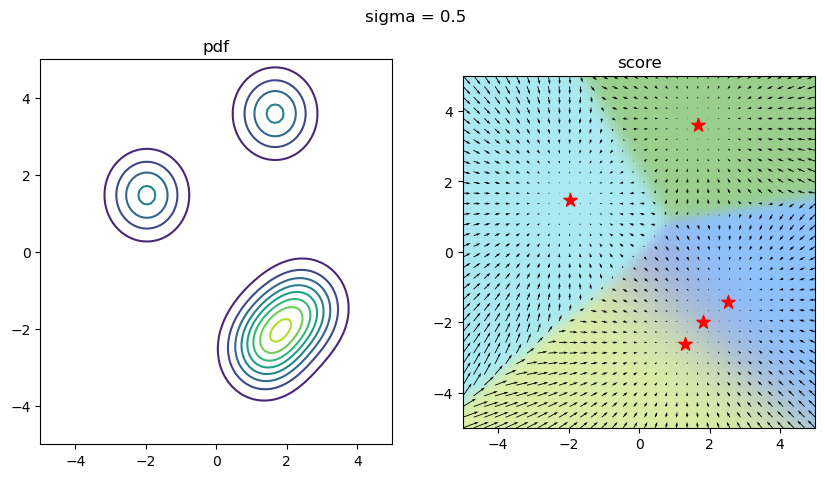

In [96]:
nsamps = 5
mus = np.array([[2, -2], 
                [1, 3],
                [-3, 2],])
sigmas = np.array([[[1, .5], [.5, 1]], 
                   [[.9, -.4], [-.4, 2]],
                   [[1, 0], [0, .3]]])
pis = np.array([0.3, 0.3, 0.3])
gmm_orig = GaussianMixture(mus, sigmas, pis)
train_samples,_,_ = gmm_orig.sample(nsamps)

eps = .5
deltam_model = GaussianMixture(train_samples, 
                            eps * np.eye(2)[None].repeat(nsamps, axis=0),
                            np.ones(nsamps))


# gmm = GaussianMixture(mus, sigmas + sigma**2 * np.eye(2)[None], pis)
npnts = 100
slc = slice(None, None, 3)
xgrid, ygrid = np.meshgrid(np.linspace(-5, 5, npnts), np.linspace(-5, 5, npnts))
X = np.column_stack([xgrid.ravel(), ygrid.ravel()])
probs = deltam_model.pdf(X)
probs = probs.reshape(npnts, npnts)
scores = deltam_model.score(X)
scores_vec = scores.reshape(npnts, npnts, 2)
_, weight_part = deltam_model.score_decompose(X)
weight_part_map = weight_part.reshape(npnts, npnts, deltam_model.n_component)
print(weight_part_map.shape)
rnd_cmap = np.random.rand(weight_part_map.shape[-1], 3)
weight_map_clr = weight_part_map @ rnd_cmap
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contour(xgrid, ygrid, probs, levels=10)
plt.title("pdf")
plt.subplot(1, 2, 2)
plt.imshow(weight_map_clr[:, :, :3], extent=(-5, 5, -5, 5), origin='lower', alpha=0.5)
plt.quiver(xgrid[slc, slc], ygrid[slc, slc], scores_vec[slc, slc, 0], scores_vec[slc, slc, 1])
plt.scatter(deltam_model.mus[:, 0], deltam_model.mus[:, 1], c='r', s=100, marker='*')
plt.title("score")
plt.suptitle(f"sigma = {eps}")
plt.show()

In [95]:
nsamps = 10
mus = np.array([[2, -2], 
                [1, 3],
                [-3, 2],])
sigmas = np.array([[[1, .5], [.5, 1]], 
                   [[.9, -.4], [-.4, 2]],
                   [[1, 0], [0, .3]]])
pis = np.array([0.3, 0.3, 0.3])
gmm_orig = GaussianMixture(mus, sigmas, pis)
train_samples,_,_ = gmm_orig.sample(nsamps)
mu_empirical = np.mean(train_samples, axis=0)
sigma_empirical = np.cov(train_samples, rowvar=False)
gauss_model = GaussianMixture(mu_empirical[None], 
                              sigma_empirical[None],
                              np.ones(1))
eps = 1e-6
deltam_model = GaussianMixture(train_samples, 
                            eps * np.eye(2)[None].repeat(nsamps, axis=0),
                            np.ones(nsamps))



In [81]:
def diffuse_gmm(gmm, sigma):
    return GaussianMixture(gmm.mus, gmm.covs + sigma**2 * np.eye(gmm.dim)[None], gmm.weights)


def diffuse_gmm_extradim(gmm, sigma, full_dim=None):
    if full_dim is None:
        full_dim = gmm.dim
    mus = np.zeros((gmm.n_component, full_dim))
    mus[:, :gmm.dim] = gmm.mus
    covs = np.zeros((gmm.n_component, full_dim, full_dim))
    covs[:, :gmm.dim, :gmm.dim] = gmm.covs
    return GaussianMixture(mus, covs + sigma**2 * np.eye(full_dim), gmm.weights)

In [76]:
def expvar_residual(score_vec1, score_vec2):
    return 1 - ((score_vec1 - score_vec2)**2).sum(axis=-1) / (score_vec1**2).sum(axis=-1)

In [80]:

sigma = 3
for sigma in [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]:
    nquery = 2000
    query_pnts = diffuse_gmm(gmm_orig, sigma).sample(nquery)[0]

    score_gmm_q = diffuse_gmm(gmm_orig, sigma).score(query_pnts)
    score_gauss_q = diffuse_gmm(gauss_model, sigma).score(query_pnts)
    score_deltam_q = diffuse_gmm(deltam_model, sigma).score(query_pnts)
    # print the MSE between the scores
    # print(np.mean((score_gmm_q - score_gauss_q)**2))
    # print(np.mean((score_gauss_q - score_deltam_q)**2))
    # print(np.mean((score_gmm_q - score_deltam_q)**2))
    from itertools import combinations
    score_col = [score_gmm_q, score_gauss_q, score_deltam_q]
    name_col = ["gmm", "gauss", "deltamix"]
    print(f"sigma = {sigma}")
    for (name0, score0),  (name1, score1) in combinations(zip(name_col, score_col), 2):
        print(f"MSE between {name0} and {name1}: {np.mean((score0 - score1)**2)}")
    # print(np.mean(expvar_residual(score_gmm_q, score_gauss_q)))
    # print(np.mean(expvar_residual(score_gauss_q, score_deltam_q)))
    # print(np.mean(expvar_residual(score_gmm_q, score_deltam_q)))


sigma = 0.1
MSE between gmm and gauss: 1.0555755768859736
MSE between gmm and deltamix: nan
MSE between gauss and deltamix: nan
sigma = 0.2
MSE between gmm and gauss: 1.0576168429338855
MSE between gmm and deltamix: 363.424690326015
MSE between gauss and deltamix: 381.89280945134453
sigma = 0.5
MSE between gmm and gauss: 0.661752813820968
MSE between gmm and deltamix: 7.469079521366378
MSE between gauss and deltamix: 9.758324434146404
sigma = 1
MSE between gmm and gauss: 0.22207227344237085
MSE between gmm and deltamix: 0.2841521852793502
MSE between gauss and deltamix: 0.6452819343871636
sigma = 2
MSE between gmm and gauss: 0.020352066719669715
MSE between gmm and deltamix: 0.008231017782854849
MSE between gauss and deltamix: 0.031767281878840974
sigma = 5
MSE between gmm and gauss: 0.00011614701498281158
MSE between gmm and deltamix: 6.466053872509545e-05
MSE between gauss and deltamix: 9.196959886789135e-05
sigma = 10
MSE between gmm and gauss: 3.488426015074766e-06
MSE between gmm 

d:\Github\DiffusionMemorization\core\gaussian_mixture_lib.py:60: RuntimeWarning: invalid value encountered in divide
  participance = weighted_compon_pdf / weighted_compon_pdf.sum(axis=1, keepdims=True)


In [83]:
full_dim = 100
sigma = 3
for sigma in [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]:
    nquery = 2000
    query_pnts = diffuse_gmm_extradim(gmm_orig, sigma, full_dim=full_dim).sample(nquery)[0]

    score_gmm_q = diffuse_gmm_extradim(gmm_orig, sigma, full_dim=full_dim).score(query_pnts)
    score_gauss_q = diffuse_gmm_extradim(gauss_model, sigma, full_dim=full_dim).score(query_pnts)
    score_deltam_q = diffuse_gmm_extradim(deltam_model, sigma, full_dim=full_dim).score(query_pnts)
    # print the MSE between the scores
    # print(np.mean((score_gmm_q - score_gauss_q)**2))
    # print(np.mean((score_gauss_q - score_deltam_q)**2))
    # print(np.mean((score_gmm_q - score_deltam_q)**2))
    from itertools import combinations
    score_col = [score_gmm_q, score_gauss_q, score_deltam_q]
    name_col = ["gmm", "gauss", "deltamix"]
    print(f"sigma = {sigma}")
    for (name0, score0),  (name1, score1) in combinations(zip(name_col, score_col), 2):
        print(f"MSE between {name0} and {name1}: {np.mean((score0 - score1)**2)}")
    # print(np.mean(expvar_residual(score_gmm_q, score_gauss_q)))
    # print(np.mean(expvar_residual(score_gauss_q, score_deltam_q)))
    # print(np.mean(expvar_residual(score_gmm_q, score_deltam_q)))


sigma = 0.1
MSE between gmm and gauss: 0.021206731098820014
MSE between gmm and deltamix: 120.59652941896375
MSE between gauss and deltamix: 121.99337708237361
sigma = 0.2
MSE between gmm and gauss: 0.02035206623954241
MSE between gmm and deltamix: 7.194657886281197
MSE between gauss and deltamix: 7.553037395707525
sigma = 0.5
MSE between gmm and gauss: 0.013569812006137069
MSE between gmm and deltamix: 0.1422617099073683
MSE between gauss and deltamix: 0.18616232015517545
sigma = 1
MSE between gmm and gauss: 0.00446721291989711
MSE between gmm and deltamix: 0.005745210820038927
MSE between gauss and deltamix: 0.013032113308345824
sigma = 2
MSE between gmm and gauss: 0.00039909444321984083
MSE between gmm and deltamix: 0.00016098266458432282
MSE between gauss and deltamix: 0.0006132051407009967
sigma = 5
MSE between gmm and gauss: 2.1734565095357332e-06
MSE between gmm and deltamix: 1.2862156727856658e-06
MSE between gauss and deltamix: 1.7200728501302496e-06
sigma = 10
MSE between gmm

In [75]:
sigma_empirical

array([[ 6.09925432, -2.62705495],
       [-2.62705495,  5.28932111]])